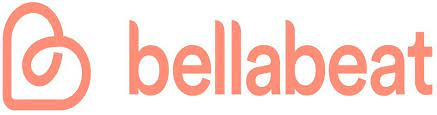

**Introduction**

Welcome to the Bellabeat data analysis case study! In this case study, you will perform many real-world tasks of a junior data
analyst. You will imagine you are working for Bellabeat, a high-tech manufacturer of health-focused products for women, and
meet different characters and team members. In order to answer the key business questions, you will follow the steps of the
data analysis process: **ask, prepare, process, analyze, share, and act**. Along the way, the Case Study Roadmap tables —
including guiding questions and key tasks — will heblp you stay on the right path.
By the end of this lesson, you will have a portfolio-ready case study. Download the packet and reference the details of this case
study anytime. Then, when you begin your job hunt, your case study will be a tangible way to demonstrate your knowledge
and skills to potential employers.


**Products**

○*Bellabeat app*: The Bellabeat app provides users with health data related to their activity, sleep, stress,menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

○ *Leaf*: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

○ *Time*: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

○ *Spring*: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

○ *Bellabeat membership*: Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and
beauty, and mindfulness based on their lifestyle and goals.

**ASK**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

You will produce a report with the following deliverables:

1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

**PREPARE**

● *FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius)*: This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

**Key tasks**

1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.

**About Dataset**

The data we used is available on kaggle. Generated by respondents from a distributed survey via Amazon Mechanical Turk.

Data is quite old as it stores data from 12 March 2016 to 12 May 2016.

Sample size of 30 female FitBit users is not representative of the entire female population.

The data is not ROCCC, hence it is not recommended to rely on information produced from this data.

In [80]:
import numpy as np  # for handling mathematical calculations.
import pandas as pd # for handling dataset.
import matplotlib.pyplot as plt # for handling graphs and visualization.
import seaborn as sns # for handling visualization.
import datetime as dt # for handling date and time.
import os

In [81]:
activity= pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep=pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
calories=pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
steps=pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
intensities=pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')

In [82]:
activity.info()

In [83]:
sleep.info()

In [84]:
calories.info()

In [85]:
steps.info()

Checking data for any kind of error.

In [86]:
activity.duplicated().sum()

In [87]:
activity.isnull().sum()

In [88]:
sleep.duplicated().sum()

In [89]:
totalSleep=sleep.drop_duplicates()
totalSleep

In [90]:
totalSleep.duplicated().sum()

Dataset doesn't have any null or duplicated values.

In [91]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
calories['ActivityHour'] = pd.to_datetime(calories['ActivityHour'])
steps['ActivityHour'] = pd.to_datetime(steps['ActivityHour'])

In [92]:
daily_df = pd.merge(activity,sleep, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])
hourly_df=pd.merge(calories,steps, how='outer', on=['Id', 'ActivityHour'])

In [93]:
daily_df = daily_df.drop_duplicates(keep='first')
hourly_df = hourly_df.drop_duplicates(keep='first')

daily_df = daily_df.drop(daily_df[(daily_df['TotalDistance'] == 0)].index)

In [94]:
daily_df.columns
daily_df.info()

**ANALYZE AND SHARE**

Now that your data is stored appropriately and has been prepared for analysis, start putting it to work. Use the following Case
Study Roadmap as a guide:

1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.

In [95]:
daily_df.describe()

We will try to establish relationship amomg all variables and analyze.

In [96]:
correlation = daily_df[['TotalSteps','Calories', 'SedentaryMinutes', 'TotalTimeInBed', 'TotalMinutesAsleep']].corr()
round(correlation,2)

From table we can conclude that:

1) Positive correlation between TotalSteps and Calories burned.

2) TotalMinutesAsleep is directly related to TotalTimeInBed.

3) Negligible correlation among SedentaryMinutes and Calories.

4) No relation between SedentaryMinutes and TotalTimeInBed and TotalMinutesAsleep.

In [97]:
# If people burn more calories by taking more steps then let's look for daily calories burn.

daily_df['DayOfWeek'] = daily_df['ActivityDate'].dt.day_name()
 
activity_by_week_day = sns.barplot(x="DayOfWeek", y="TotalSteps", data=daily_df,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], capsize=.9)

Users take avg of 8500 steps total everyday and remain most active on starting of week.

In [98]:
#Let's track most active hour.
hourly_df['HourOfDay'] = hourly_df['ActivityHour'].dt.hour
hourly_df['DayOfWeek'] = hourly_df['ActivityHour'].dt.day_name()

# Plot linechart on HourOfDay against StepTotal
hourly_activity_by_day_hour = sns.barplot(x='HourOfDay', y='StepTotal', data=hourly_df)
_ = plt.xticks(hourly_df['HourOfDay'].unique())

Users remain mostly active during evening around 6pm-8pm. That means users keep their fitbit devices with them.

In [100]:
#Analyze users who keep their fitbit during sleep.
sleep_dis = dict(daily_df.groupby('Id').TotalMinutesAsleep.count())

sleep_dis_df = pd.DataFrame(list(sleep_dis.items()), columns = ['Id', 'TotalDaysTracked'])

def bin_names(df):
    if df['TotalDaysTracked'] > 25:
        return '26-33 days'
    elif df['TotalDaysTracked'] > 20:
        return '21-25 days'
    elif df['TotalDaysTracked'] > 15:
        return '16-20 days'
    elif df['TotalDaysTracked'] > 10:
        return '11-15 days'
    elif df['TotalDaysTracked'] > 5:
        return '6-10 days'
    elif df['TotalDaysTracked'] > 0:
        return '1-5 days'
    else:
        return '0 day'

In [101]:
sleep_dis_df['DaysTracked'] = sleep_dis_df.apply(bin_names, axis = 1)

bin_count = sleep_dis_df.groupby('DaysTracked').TotalDaysTracked.count()

bin_df = pd.DataFrame(list(bin_count.items()), columns = ['Days Tracked', 'Numbers of Users'])

bin_df = bin_df.reindex([0, 1, 6, 2, 3, 4, 5])

bin_df['Percentage'] = [round(x / len(activity.Id.unique()) * 100, 1) for x in bin_df['Numbers of Users']]
bin_df

From the table we found that:
1) Out of 33 users 9 didn't track their sleep record.
2) Only 12 users keep track of their sleep record.

In [112]:
user_df = daily_df.groupby(['Id']).mean()

# Add column UserType based on TotalSteps
user_df['UserType'] =  np.where(user_df['TotalSteps']<5000, 'Sendetary',
                       np.where(user_df['TotalSteps']<7500, 'Lightly Active',
                       np.where(user_df['TotalSteps']<10000, 'Faily Active', 'Very Active')))

# Create user_type_df
user_type_df = user_df.groupby(['UserType']).size()

# Plot piechart on user
_ = plt.pie(user_type_df, labels=user_type_df.index, autopct='%.0f%%')
_ = plt.title('User Type By Daily Steps')

Large amout of users remain fairly active and regularly use their fitbit trackers.

**ACT**

Now that you have finished creating your visualizations, act on your findings. Prepare the deliverables you have been asked to
create, including the high-level recommendations based on your analysis.

*Insights*:

1) Users remain active mostly on Mondays, Tuesdays, Saturdays during evening. They burn more calories.

2) On avg users take 8500 steps which is less than ideal 10000.

3) A considerable portion of users remain fairly or mostly active.

4) The users who remain active most likely track their sleep regularly and hence we can call them health conscious people.

*Steps*:

1) Company should focus on ease of access of wearability of devices so that users can wear devices for longer duration.

2) Encourage people of healthy lifecycle so that they use more products and services. An updated app with features to promote health can play crucial role.

3) Make people follow a healthy sleep cycle so that they wake up early and can spend mornings doing exercise. An app with right features loaded can help to do that.